# Lesson_2

### Критерии согласия

In [1]:
import numpy as np # Подгрузим нужные библиотеки
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
sns.set()

In [2]:
plt.rcParams['figure.figsize'] = [10, 8] # Параметры графиков по умолчанию ко всему ноутбуку

### Генерируем данные

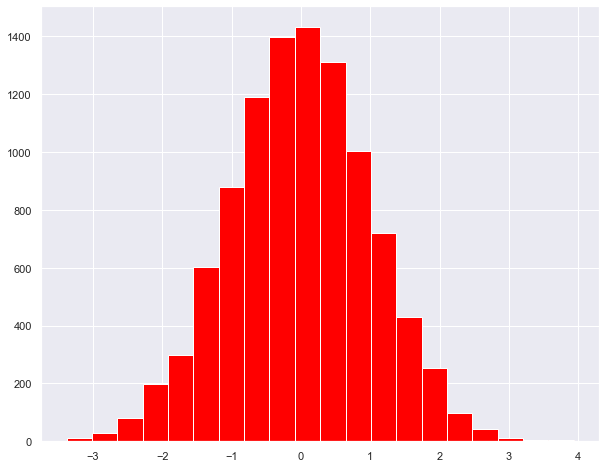

In [3]:
norm_sample = st.norm.rvs(size=10000) # Нормальная выборка
plt.hist(norm_sample, color='red', bins=20);

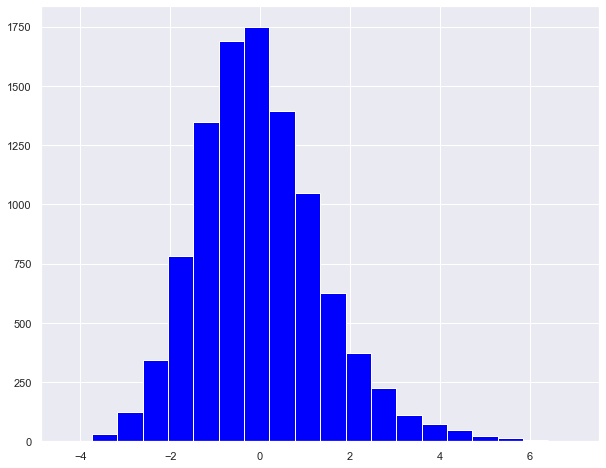

In [4]:
skewed_sample = st.norm.rvs(-1, size=10000) + st.expon.rvs(size=10000) # Скошенная выборка
plt.hist(skewed_sample, color='blue', bins=20);

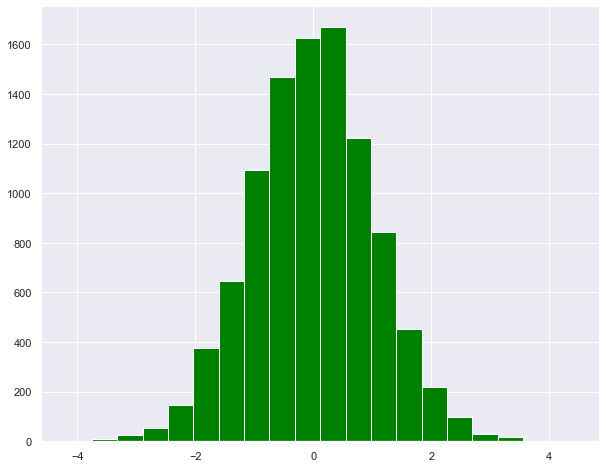

In [5]:
t_sample = st.t.rvs(size=10000, df=30) # Выборка из распределения стьюдента (далее T - выборка)
plt.hist(t_sample, color='green', bins=20);

### Анализ выборок с помощью QQ plot

### Нормальная выборка

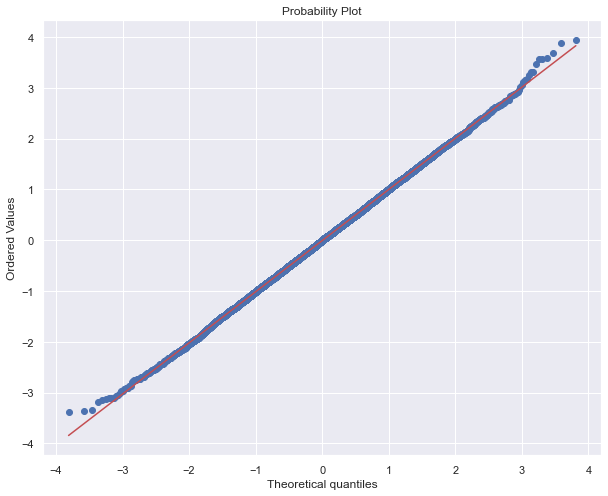

In [6]:
st.probplot(norm_sample, plot=plt);

### Скошенная выборка

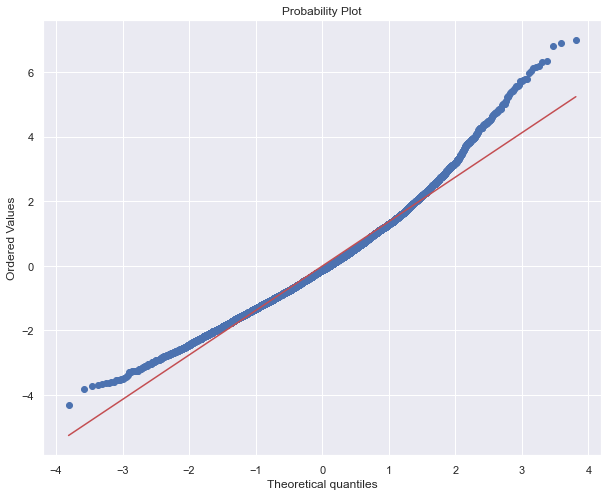

In [7]:
st.probplot(skewed_sample, plot=plt);

### T - выборка

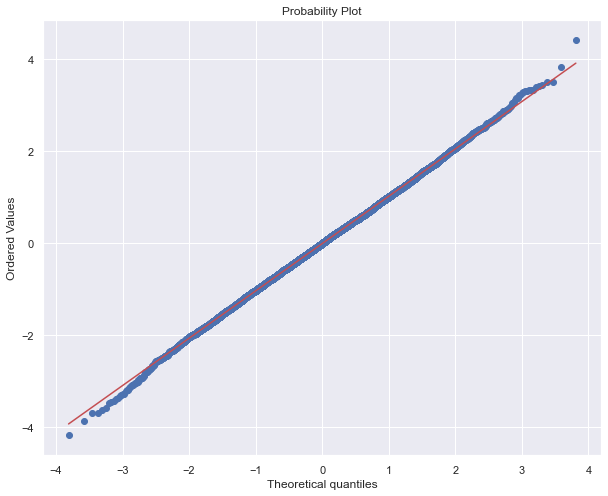

In [8]:
st.probplot(t_sample, plot=plt);

Отсюда уже можно уже иметь хорошее представление о данных. Отметим, что QQ plot для нормальной и T выборок очень похожи (ведь не зря T сходится слабо к нормальному).

### Критерии согласия

### Тест Колмогорова (проверка простой гипотезы)

Будем проверять гипотезу о том, что наблюдаемое распределение является стандартным нормальным. Сделаем это для трех выборок.
В документации можно посмотреть необходимые условия для использования критерия. Как мы помним, он используется, когда
распределение непрерывно. Также заметим, что есть подходы, где с помощью этого критерия можно проверять и сложную гипотезу,
но с некоторыми оговорками. Мы это опустим.

In [9]:
st.kstest(norm_sample, st.norm.cdf) # Для нормальной выборки

KstestResult(statistic=0.006815664555285539, pvalue=0.7389499961991957)

In [10]:
st.kstest(skewed_sample, st.norm.cdf) # Для скошенной выборки

KstestResult(statistic=0.08985664922286007, pvalue=1.0432085789520569e-70)

In [11]:
st.kstest(t_sample, st.norm.cdf) # Для T - выборки

KstestResult(statistic=0.008492831658373223, pvalue=0.4638852458763215)

Как мы видим, вторым аргументом идет плотность. Так как мы проверяем на стандартное нормальное, то по дефолту аргументов у
st.norm.cdf указывать не надо. Но если у нас параметры другие, то делается это следующим образом:

In [12]:
norm_sample2 = st.norm.rvs(size=10000, loc=1, scale=2) # Для нормальной выборки c параметрами 1 и 2

st.kstest(norm_sample2, lambda x: st.norm.cdf(x, loc=1, scale=2))

KstestResult(statistic=0.008270189845312317, pvalue=0.498261502512496)

Заметим, что для дискретного действительно не работает:

In [13]:
st.kstest(st.binom.rvs(size=10000, n=30, p=0.5), lambda x: st.binom.cdf(x, n=30, p=0.5))

KstestResult(statistic=0.14453222404718397, pvalue=9.262555495149003e-183)

### Тест Шапиро - Уилка

Работает корректно только для выборок обьема меньше 5000. Является наиболее мощным тестом для проверки нормальности. Будем его использовать, если выборка удовлетворяет заданным условиям.

In [14]:
small_norm_sample = st.norm.rvs(size=3000)
st.shapiro(small_norm_sample)

ShapiroResult(statistic=0.9993430376052856, pvalue=0.3801998198032379)

In [15]:
small_t_sample = st.t.rvs(size=3000, df=30)
st.shapiro(small_t_sample)

ShapiroResult(statistic=0.9996135830879211, pvalue=0.856522262096405)

### Тест Жака - Бера

Работает корректно только для выборок обьема больше 2000 (тогда можно считать, что статистика имеет приблизительно распределение хи - квадрат с двумя степенями свободы).

Для нас этот тест важен, так как на больших данных, например, больше 5-10 тысяч, мы будем применять его (так как тест Шапиро - Уилка уже не работает).

In [16]:
st.jarque_bera(norm_sample)

Jarque_beraResult(statistic=0.20926744129865862, pvalue=0.9006543532691881)

In [17]:
st.jarque_bera(skewed_sample)

Jarque_beraResult(statistic=1166.047650770173, pvalue=0.0)

In [18]:
st.jarque_bera(t_sample)

Jarque_beraResult(statistic=8.26300349105665, pvalue=0.01605874455753209)

Последние два теста для нас могут быть полезны лишь в академическом случае и использовать в дальнейшем мы их не будем.

### Тест Андерсона - Дарлинга

In [19]:
st.anderson?

### Тест Лиллиефорса

In [20]:
from statsmodels.stats.diagnostic import lilliefors

In [21]:
lilliefors?